In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_2x2layers = pd.read_excel('Simulation_FHNW-Muttenz_CardioFlux_V1.2.xlsx',
                    sheet_name='2_area_of_interest',
                    header=3,
                    converters={col: float for col in range(0, 10)}
                    )

In [3]:
df_3x2_layers = pd.read_excel('Simulation_FHNW-Muttenz_CardioFlux_V1.2.xlsx',
                    sheet_name='3xMumetal_2xAlu',
                    header=3,
                    converters={col: float for col in range(0, 10)}
                    )

In [4]:
df_airgap = pd.read_excel('Simulation_FHNW-Muttenz_CardioFlux_V1.2.xlsx',
                    sheet_name='air_gap',
                    header=3,
                    converters={col: float for col in range(0, 10)}
                    )

In [5]:
df_2x2layers = df_2x2layers.drop(['reached target', 'rached target', 'both', 'Unnamed: 9', 'reached target.1', 'rached target.1', 'both.1', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], axis=1)

In [6]:
df_3x2_layers = df_3x2_layers.drop(['reached target', 'rached target', 'both', 'Unnamed: 9', 'reached target.1', 'rached target.1', 'both.1', 'Unnamed: 15', 'Unnamed: 16',
       '1 Area of interest', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', '2 Area of interest'], axis=1)

In [7]:
df_airgap = df_airgap.drop(['reached target', 'rached target', 'both', 'Unnamed: 9', 'reached target.1', 'rached target.1', 'both.1', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25'], axis=1)

In [8]:
df_airgap.columns

Index(['d_mumetal (m)', 'd_alu (m)', 'dist_midpoint_to_border (m)',
       'freq (Hz)', 'B (T)', 'B (T).1', 'B (T).2', 'B (T).3'],
      dtype='object')

In [9]:
df_2x2layers = df_2x2layers[df_2x2layers[df_2x2layers.columns[0]] == 0.0015]
df_2x2layers = df_2x2layers[df_2x2layers[df_2x2layers.columns[1]] == 0.005]

In [10]:
df_3x2_layers = df_3x2_layers[df_3x2_layers[df_3x2_layers.columns[0]] == 0.0015]
df_3x2_layers = df_3x2_layers[df_3x2_layers[df_3x2_layers.columns[1]] == 0.005]

In [11]:
df_airgap = df_airgap[df_airgap[df_airgap.columns[0]] == 0.0015]
df_airgap = df_airgap[df_airgap[df_airgap.columns[1]] == 0.005]

In [12]:
names = ['d_mu_metal (m)', 'd_alu (m)', 'dist_mid (m)', 'freq (Hz)', 'Bx_1 (T)', 'By_1 (T)', 'Bx_2 (T)', 'By_2 (T)']

In [13]:
df_2x2layers.columns = names
df_3x2_layers.columns = names
df_airgap.columns = names

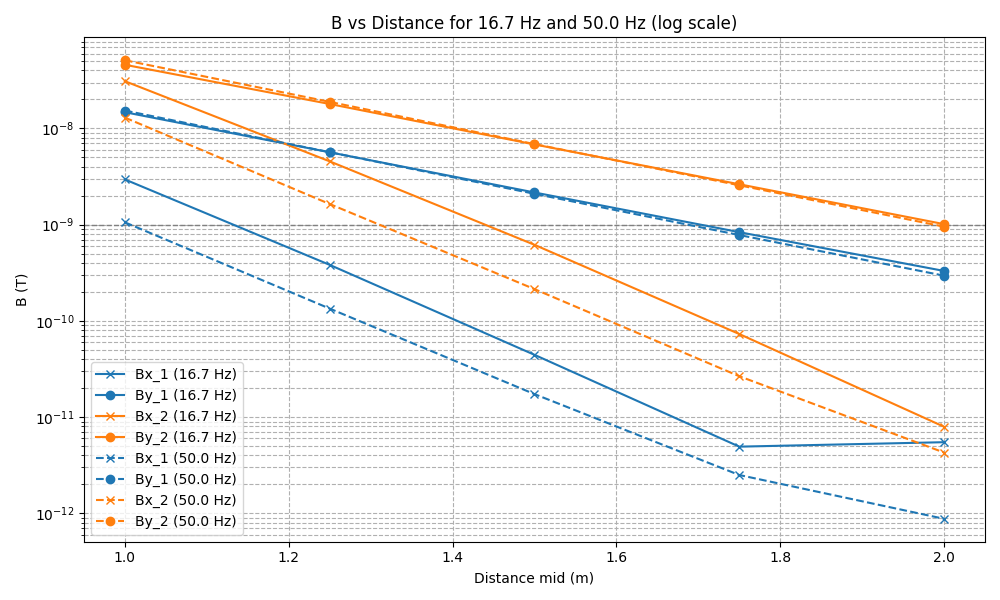

In [14]:
### 2X2 LAYERS ###

# Set colors for sensors
color_1 = 'tab:blue'
color_2 = 'tab:orange'

# Set linestyles by frequency
freq_styles = {
    16.7: '-',
    50.0: '--'
}

%matplotlib widget

plt.figure(figsize=(10, 6))
plt.title("B vs Distance for 16.7 Hz and 50.0 Hz (log scale)")
plt.xlabel("Distance mid (m)")
plt.ylabel("B (T)")
plt.yscale('log')
plt.axhline(y=1e-9, color='gray', linestyle='--', linewidth=1)

# To avoid duplicate legend labels
labels_used = set()

for freq_val in [16.7, 50.0]:
    df_freq = df_2x2layers[df_2x2layers['freq (Hz)'] == freq_val]
    linestyle = freq_styles[freq_val]

    for group_val, group_df in df_freq.groupby('d_mu_metal (m)'):
        for col, marker, color in [
            ('Bx_1 (T)', 'x', color_1),
            ('By_1 (T)', 'o', color_1),
            ('Bx_2 (T)', 'x', color_2),
            ('By_2 (T)', 'o', color_2),
        ]:
            label = f"{col.split()[0]} ({freq_val} Hz)"
            if label not in labels_used:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color, label=label)
                labels_used.add(label)
            else:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color)

plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


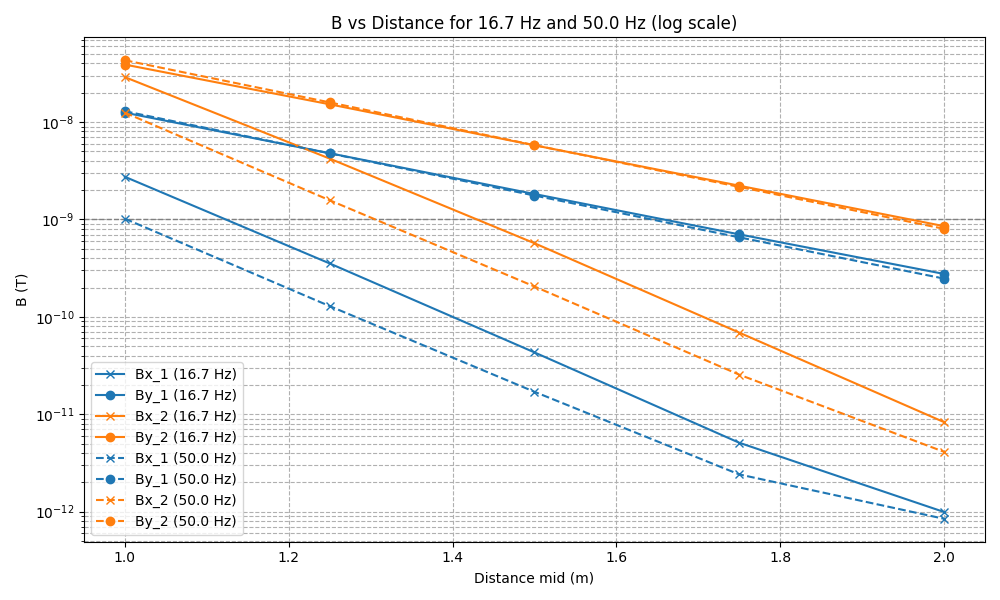

In [15]:
### 3X2 LAYERS ###


# Set colors for sensors
color_1 = 'tab:blue'
color_2 = 'tab:orange'

# Set linestyles by frequency
freq_styles = {
    16.7: '-',
    50.0: '--'
}

%matplotlib widget

plt.figure(figsize=(10, 6))
plt.title("B vs Distance for 16.7 Hz and 50.0 Hz (log scale)")
plt.xlabel("Distance mid (m)")
plt.ylabel("B (T)")
plt.yscale('log')
plt.axhline(y=1e-9, color='gray', linestyle='--', linewidth=1)

# To avoid duplicate legend labels
labels_used = set()

for freq_val in [16.7, 50.0]:
    df_freq = df_3x2_layers[df_3x2_layers['freq (Hz)'] == freq_val]
    linestyle = freq_styles[freq_val]

    for group_val, group_df in df_freq.groupby('d_mu_metal (m)'):
        for col, marker, color in [
            ('Bx_1 (T)', 'x', color_1),
            ('By_1 (T)', 'o', color_1),
            ('Bx_2 (T)', 'x', color_2),
            ('By_2 (T)', 'o', color_2),
        ]:
            label = f"{col.split()[0]} ({freq_val} Hz)"
            if label not in labels_used:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color, label=label)
                labels_used.add(label)
            else:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color)

plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

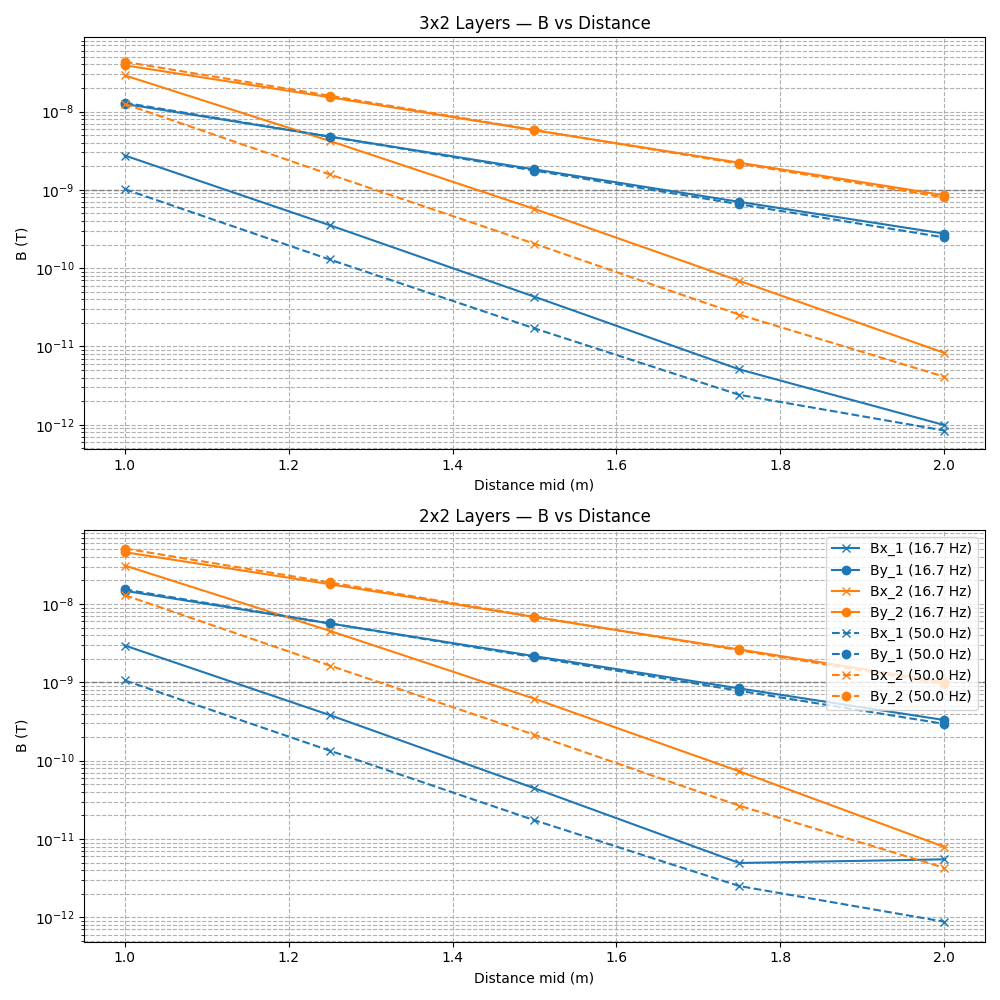

In [16]:
### BOTH 2X2 and 3X2 LAYERS ###


# Set colors for sensors
color_1 = 'tab:blue'
color_2 = 'tab:orange'

# Set linestyles by frequency
freq_styles = {
    16.7: '-',
    50.0: '--'
}

%matplotlib widget

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharey=True)

# List of (DataFrame, title) pairs
plot_configs = [
    (df_3x2_layers, "3x2 Layers"),
    (df_2x2layers, "2x2 Layers")
]

for ax, (df, title) in zip(axes, plot_configs):
    ax.set_title(f"{title} — B vs Distance")
    ax.set_xlabel("Distance mid (m)")
    ax.set_ylabel("B (T)")
    ax.set_yscale('log')
    ax.axhline(y=1e-9, color='gray', linestyle='--', linewidth=1)
    ax.grid(True, which="both", ls="--")

    labels_used = set()

    for freq_val in [16.7, 50.0]:
        df_freq = df[df['freq (Hz)'] == freq_val]
        linestyle = freq_styles[freq_val]

        for group_val, group_df in df_freq.groupby('d_mu_metal (m)'):
            for col, marker, color in [
                ('Bx_1 (T)', 'x', color_1),
                ('By_1 (T)', 'o', color_1),
                ('Bx_2 (T)', 'x', color_2),
                ('By_2 (T)', 'o', color_2),
            ]:
                label = f"{col.split()[0]} ({freq_val} Hz)"
                if label not in labels_used:
                    ax.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color, label=label)
                    labels_used.add(label)
                else:
                    ax.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color)

# Add a single legend for both plots
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()


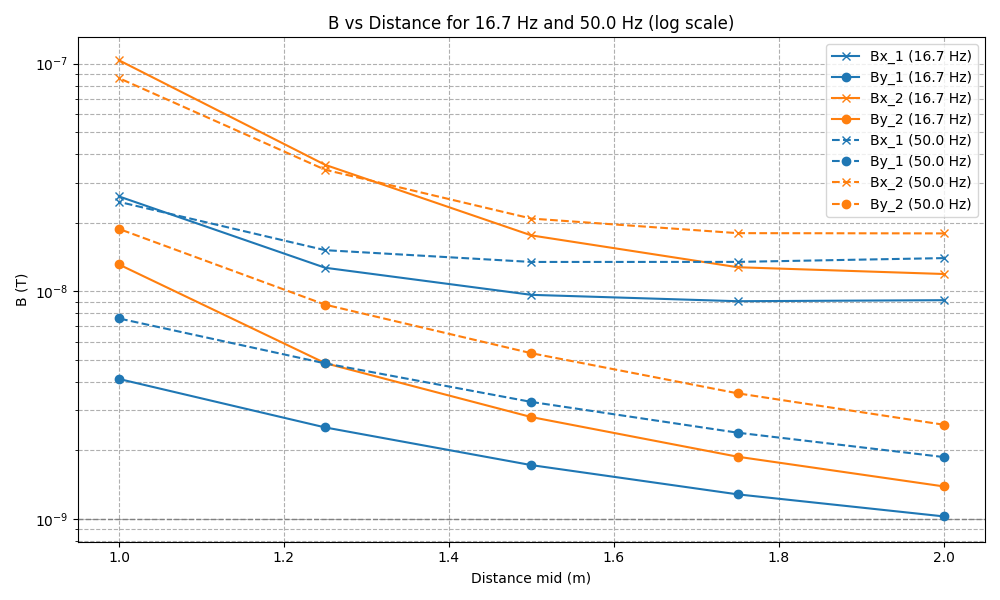

In [17]:
### AIR GAP ###

# Set colors for sensors
color_1 = 'tab:blue'
color_2 = 'tab:orange'

# Set linestyles by frequency
freq_styles = {
    16.7: '-',
    50.0: '--'
}

%matplotlib widget

plt.figure(figsize=(10, 6))
plt.title("B vs Distance for 16.7 Hz and 50.0 Hz (log scale)")
plt.xlabel("Distance mid (m)")
plt.ylabel("B (T)")
plt.yscale('log')
plt.axhline(y=1e-9, color='gray', linestyle='--', linewidth=1)

# To avoid duplicate legend labels
labels_used = set()

for freq_val in [16.7, 50.0]:
    df_freq = df_airgap[df_airgap['freq (Hz)'] == freq_val]
    linestyle = freq_styles[freq_val]

    for group_val, group_df in df_freq.groupby('d_mu_metal (m)'):
        for col, marker, color in [
            ('Bx_1 (T)', 'x', color_1),
            ('By_1 (T)', 'o', color_1),
            ('Bx_2 (T)', 'x', color_2),
            ('By_2 (T)', 'o', color_2),
        ]:
            label = f"{col.split()[0]} ({freq_val} Hz)"
            if label not in labels_used:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color, label=label)
                labels_used.add(label)
            else:
                plt.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color)

plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

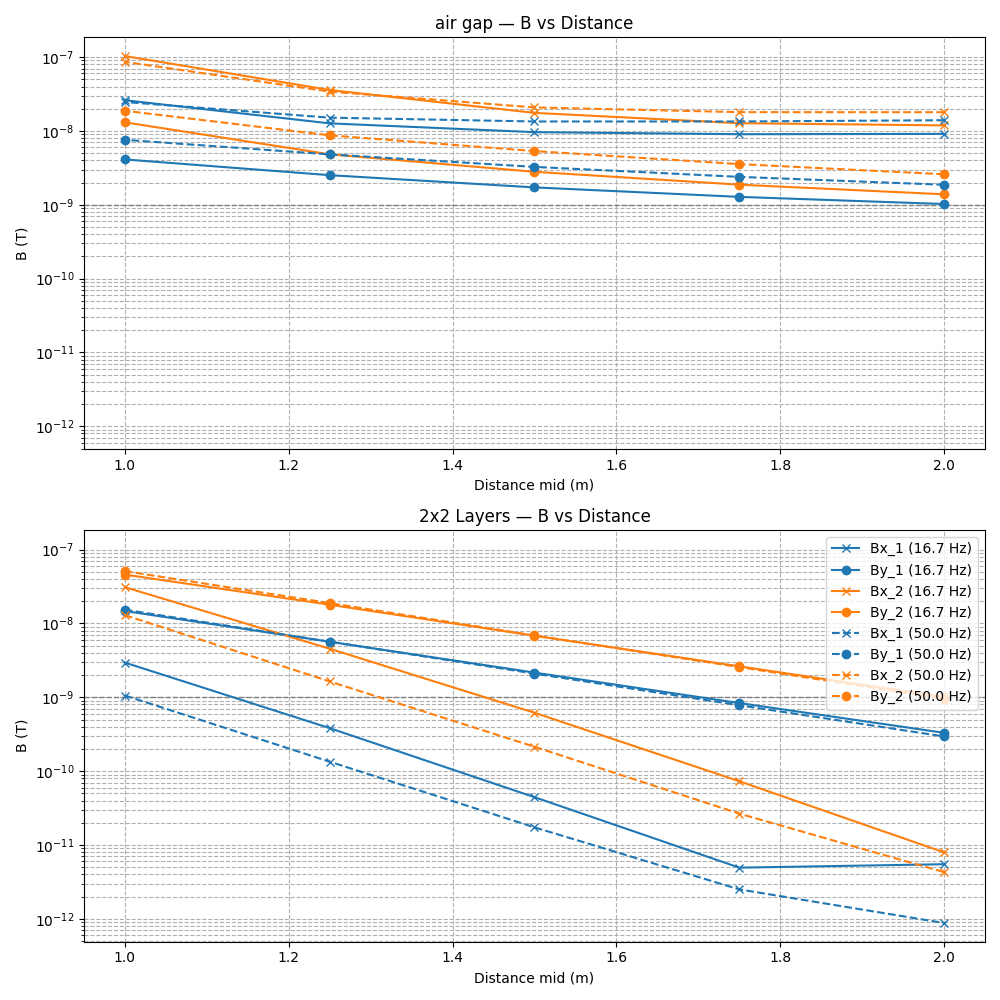

In [18]:
### 2X2 LAYERS AND AIR GAP ###


# Set colors for sensors
color_1 = 'tab:blue'
color_2 = 'tab:orange'

# Set linestyles by frequency
freq_styles = {
    16.7: '-',
    50.0: '--'
}

%matplotlib widget

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), sharey=True)

# List of (DataFrame, title) pairs
plot_configs = [
    (df_airgap, "air gap"),
    (df_2x2layers, "2x2 Layers")
]

for ax, (df, title) in zip(axes, plot_configs):
    ax.set_title(f"{title} — B vs Distance")
    ax.set_xlabel("Distance mid (m)")
    ax.set_ylabel("B (T)")
    ax.set_yscale('log')
    ax.axhline(y=1e-9, color='gray', linestyle='--', linewidth=1)
    ax.grid(True, which="both", ls="--")

    labels_used = set()

    for freq_val in [16.7, 50.0]:
        df_freq = df[df['freq (Hz)'] == freq_val]
        linestyle = freq_styles[freq_val]

        for group_val, group_df in df_freq.groupby('d_mu_metal (m)'):
            for col, marker, color in [
                ('Bx_1 (T)', 'x', color_1),
                ('By_1 (T)', 'o', color_1),
                ('Bx_2 (T)', 'x', color_2),
                ('By_2 (T)', 'o', color_2),
            ]:
                label = f"{col.split()[0]} ({freq_val} Hz)"
                if label not in labels_used:
                    ax.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color, label=label)
                    labels_used.add(label)
                else:
                    ax.plot(group_df['dist_mid (m)'], group_df[col], linestyle=linestyle, marker=marker, color=color)

# Add a single legend for both plots
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In [19]:
df_airgap

,d_mu_metal (m),d_alu (m),dist_mid (m),freq (Hz),Bx_1 (T),By_1 (T),Bx_2 (T),By_2 (T)
6,0.0015,0.005,2.00,16.7,9.127600e-09,1.024500e-09,1.189600e-08,1.387500e-09
7,0.0015,0.005,2.00,50.0,1.397100e-08,1.867400e-09,1.793700e-08,2.589800e-09
22,0.0015,0.005,1.75,16.7,9.033200e-09,1.280600e-09,1.274000e-08,1.874000e-09
23,0.0015,0.005,1.75,50.0,1.344500e-08,2.389500e-09,1.798400e-08,3.558300e-09
38,0.0015,0.005,1.50,16.7,9.634700e-09,1.721000e-09,1.757900e-08,2.798200e-09
39,0.0015,0.005,1.50,50.0,1.343800e-08,3.261300e-09,2.084000e-08,5.338300e-09
54,0.0015,0.005,1.25,16.7,1.267100e-08,2.519700e-09,3.588700e-08,4.828100e-09
55,0.0015,0.005,1.25,50.0,1.513900e-08,4.816300e-09,3.414700e-08,8.724000e-09
70,0.0015,0.005,1.00,16.7,2.607400e-08,4.114100e-09,1.033600e-07,1.309800e-08
71,0.0015,0.005,1.00,50.0,2.467800e-08,7.587600e-09,8.627800e-08,1.877000e-08


In [20]:
1023/20

51.15

In [21]:
1023e-9/(51*109*40)

4.600647598488937e-12

In [22]:
1023e-9/(51*109*40*np.sqrt(50))

np.float64(6.506298229482264e-13)

In [23]:
3.5e9*10e-6

35000.0

In [24]:
3.5e9*100e-6

350000.0

In [25]:
gamma = 7e9

In [26]:
5.92*35.8/13.45

15.757323420074348

In [27]:
6.8/5*4

5.4399999999999995

In [28]:
100/1.36

73.52941176470588

In [29]:
1/1.36

0.7352941176470588